# Author: Trevor Dorn-Wallenstein
# 11/15/17
# Let's design survey fields of $h+\chi$ Persei that cover a maximum number of a given set of stars.

In [1]:
import numpy as np, astropy.io.fits as fits, matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import minimize
import emcee as mc
from survey_tools import *
%matplotlib inline

In [2]:
member_hdu = fits.open('cluster_members.fits')
member_table = Table(member_hdu[1].data)
OB_table = member_table[member_table['SpT'] <= 20]

/Users/carina/anaconda/lib/python3.5/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, oper)(other)


In [3]:
OB_list = [Star(ra,dec) for ra,dec in zip(OB_table['RAJ2000'],OB_table['DEJ2000'])]

In [6]:
#This is a kinda crappy method. Keeping it in the notebook for now.
def design_survey(star_list, N_fields, N_start = None, overlap_bonus = 0.1):
    """
    Designs a survey by progressively eliminating the field that contributes to the survey
    value the least
    
    Parameters
    ----------
    star_list : list
        list of Star objects
    N_fields : int
        The target number of fields in the survey
    N_start : int
        If given, starts the survey with N_start random fields chosen from star_list
    overlap_bonus : float
        bonus you want to give to stars that appear in multiple fields
        
    Returns
    -------
    field_list : list
        list of Field objects that remain.
    """
    
    #Initialize fields from star list
    if N_start is not None:
        field_list = np.array([Field.from_star_list(star_list=star_list,size=3.0) for j in range(N_start)])
    else:
        field_list = np.array([Field.from_star_list(star_list=star_list,size=3.0,random=False,i=j) for j in range(len(star_list))])
    
    while len(field_list) != N_fields:
        
        scores = []
        
        for i,field in enumerate(field_list):
            
            #Get rid of one field
            trial_list = field_list[field_list != field]
            #Score the survey
            this_score = score_survey(star_list,trial_list,overlap_bonus)
            scores.append(this_score)
            
        field_list = np.delete(field_list,np.argmax(scores))
        print(len(field_list))
        
    return field_list

In [4]:
#loading in the chain from an emcee run!
samples = np.loadtxt('outchain.txt.gz')

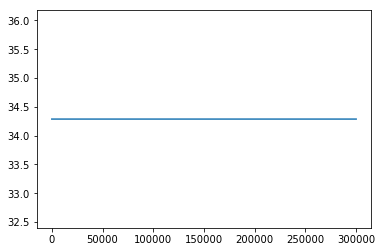

In [11]:
#Well this shit didn't work
plt.plot(samples[:,10])

In [16]:
#Just gonna use initialize_fields to get somewhere to start and do it by hand.
scores = []
surveys = []
for i in range(100):
    foo = initialize_fields(N_fields=30,star_list=OB_list,size=3.0)
    score = score_survey(field_list=foo,overlap_bonus=0.01,star_list=OB_list)
    scores.append(score)
    surveys.append(foo)
    
the_survey = surveys[np.argmax(scores)]

In [17]:
start_string = '# Region file format: DS9 version 4.1 \nglobal color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nicrs'

for field in the_survey:
    
    reg_str = field.to_region_string()
    
    start_string += ' \n'
    
    start_string += reg_str

with open('field_reg.reg','w') as f:
    f.write(start_string)

start_string

'# Region file format: DS9 version 4.1 \nglobal color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nicrs \nbox(35.4511,57.22789999999999,3.0\',3.0\',0) \nbox(34.7063,57.097199999999994,3.0\',3.0\',0) \nbox(35.1949,56.73919999999999,3.0\',3.0\',0) \nbox(34.5667,57.06389999999999,3.0\',3.0\',0) \nbox(34.7322,57.15189999999999,3.0\',3.0\',0) \nbox(35.267399999999995,56.969199999999994,3.0\',3.0\',0) \nbox(34.314899999999994,56.897999999999996,3.0\',3.0\',0) \nbox(35.66139999999999,57.193999999999996,3.0\',3.0\',0) \nbox(35.77179999999999,57.311499999999995,3.0\',3.0\',0) \nbox(35.488499999999995,57.00959999999999,3.0\',3.0\',0) \nbox(34.90259999999999,57.25869999999999,3.0\',3.0\',0) \nbox(34.4725,57.461299999999994,3.0\',3.0\',0) \nbox(34.442899999999995,57.40449999999999,3.0\',3.0\',0) \nbox(35.906499999999994,57.346799999999995,3.0\',3.0\',0) \nbox(34.6089,57.542399999999994,3.0\',3.0\',0) \nbo

In [ ]:
the_survey